In [2]:
#What I need to extract from the page in order to perform my analysis:
# -Prices
# -Ratings
# -Title

# Identify the average book price, average book rating, and the 50 most expensive books and their rating.

#Collecting the data I need using Beautiful Soup.

#Importing the necessary libraries I will be using.
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
#Empty list that will hold the dictionary that will be appended to and converted into a csv file later.
book_data=[]

#Number of pages to be selected
no_of_pages = 50

#Using requests to get the items from the page and convert it from request object to beautiful soup object, iterating over it, then storing it all in a python dictionary 
for i in range(1,no_of_pages+1):
    url=('https://books.toscrape.com/catalogue/page-{}.html'.format(i))
    page=requests.get(url)
    soup=BeautifulSoup(page.text,'html.parser')
    for e in soup.select('article'):
        book_data.append({
            'title':e.h3.get_text(strip=True),
            'price':e.select_one('.price_color').text[2:],
            'rating':e.p.get('class')[-1],
            #'additional':'data'
        })

#Converting dictionary to a Pandas dataframe
df=pd.DataFrame(book_data) 

#Checking the dataframe conversion worked
df

#Changing the index to start from 1 instead of 0
df.index+=1

#Converting the Ratings column from string to the corresponding integer
df['rating']=df['rating'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5})
df['rating'] = df['rating'].astype(int)

#Converting the 'price' column to a float to perform pandas nlargest on the column.
df['price'] = df['price'].astype(float)

#Converting pandas dataframe to a csv
#df.to_csv('bookstore.csv')

#Checking the data types to make sure ratings converted to the correct dtype
df.dtypes

#Using pandas nlargest to get the 20 most expensive books and storing the output in a variable.
top50Books = df.nlargest(50, columns='price')

#Displaying the top 50 most expensive books
top50Books

,title,price,rating
649,The Perfect Play (Play ...,59.99,3
618,Last One Home (New ...,59.98,3
861,Civilization and Its Discontents,59.95,2
561,The Barefoot Contessa Cookbook,59.92,5
367,The Diary of a ...,59.90,3
658,The Bone Hunters (Lexy ...,59.71,3
134,Thomas Jefferson and the ...,59.64,1
388,Boar Island (Anna Pigeon ...,59.48,3
394,The Improbability of Love,59.45,1
550,The Man Who Mistook ...,59.45,4


In [4]:
#Renaming the columns so they're uppercase.
df = df.rename(columns={'title':'Title','price':'Price','rating':'Rating'})
df

,Title,Price,Rating
1,A Light in the ...,51.77,3
2,Tipping the Velvet,53.74,1
3,Soumission,50.10,1
4,Sharp Objects,47.82,4
5,Sapiens: A Brief History ...,54.23,5
...,...,...,...
996,Alice in Wonderland (Alice's ...,55.53,1
997,"Ajin: Demi-Human, Volume 1 ...",57.06,4
998,A Spy's Devotion (The ...,16.97,5
999,1st to Die (Women's ...,53.98,1


In [5]:
#Checking if there are any null values and if so, how many in each column.
df.isna().sum()

Title     0
Price     0
Rating    0
dtype: int64

In [7]:
# Sorting by rating to see the lowest rated books.
df.sort_values(by="Rating", ascending=True, inplace=True)
df.head(50)

,Title,Price,Rating
240,The Rosie Project (Don ...,54.04,1
67,The Gutsy Girl: Escapades ...,37.13,1
68,The Electric Pencil: Drawings ...,56.06,1
440,Don't Forget Steven,33.23,1
695,World War Z: An ...,21.80,1
72,The Age of Genius: ...,19.73,1
437,If I Gave You ...,20.91,1
434,Nap-a-Roo,25.08,1
629,Evicted: Poverty and Profit ...,42.27,1
498,Toddlers Are A**holes: It's ...,25.55,1


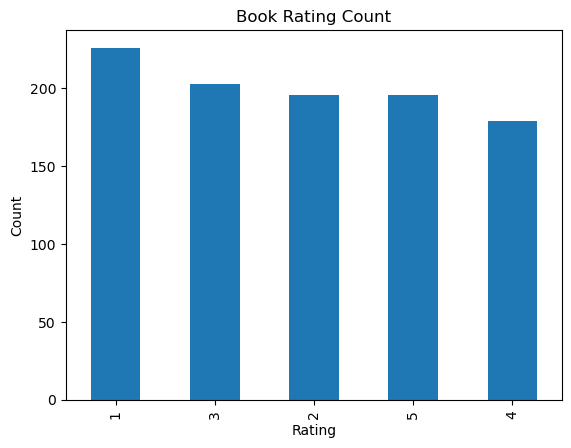

The average book rating is 2.923.
The average book price is 35.07035.


,Price,Rating
Price,1.000000,0.028166
Rating,0.028166,1.000000


In [8]:
#Plotting the number ratings in a bar chart.
ax = df['Rating'].value_counts() \
    .head(50) \
    .plot(kind='bar', title='Book Rating Count')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

#There is no correlation between price and rating

#Finding the average book rating
ratingAvg = df['Rating'].mean()

#Finding the average book price
priceAvg = df['Price'].mean()

print(f"The average book rating is {ratingAvg}.")
print(f"The average book price is {priceAvg}.")

#It looks like the highest rating count is a 1 star rating. More books have a 1 star rating than any other rating.

#Checking for correlation between price and rating of books.
df_corr = df[['Price', 'Rating']].corr()
df_corr